In [97]:
#let`s build the model now as we are done with the EDA

#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [199]:
df = pd.read_csv('customer_booking.csv',encoding='latin1')

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [200]:
#first let`s do some pre  processing on the data such as encoding the categorical variables

cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns are:",cat_cols)

#now let`s encode the categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

Categorical Columns are: Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int32  
 2   trip_type              50000 non-null  int32  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int32  
 7   route                  50000 non-null  int32  
 8   booking_origin         50000 non-null  int32  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int32(5), int64(8)
memory usage: 4.4 MB

In [102]:
#spliting the dataset into X and y

X = df.drop('booking_complete',axis=1)

y = df['booking_complete']

In [103]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52


In [104]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [105]:
y.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [106]:
#splitting the dataset into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40000, 13), (10000, 13), (40000,), (10000,))

In [108]:
#scaling the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [109]:
#building the model

lr = LogisticRegression(class_weight='balanced', random_state=42)

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test,lr_pred)

print("Accuracy of Logistic Regression is:",lr_acc)

Accuracy of Logistic Regression is: 0.6081


In [110]:
lr.score(X_train,y_train)

0.612025

In [111]:
lr.score(X_test,y_test)

0.6081

Confusion Matrix of Logistic Regression is: [[5107 3413]
 [ 506  974]]


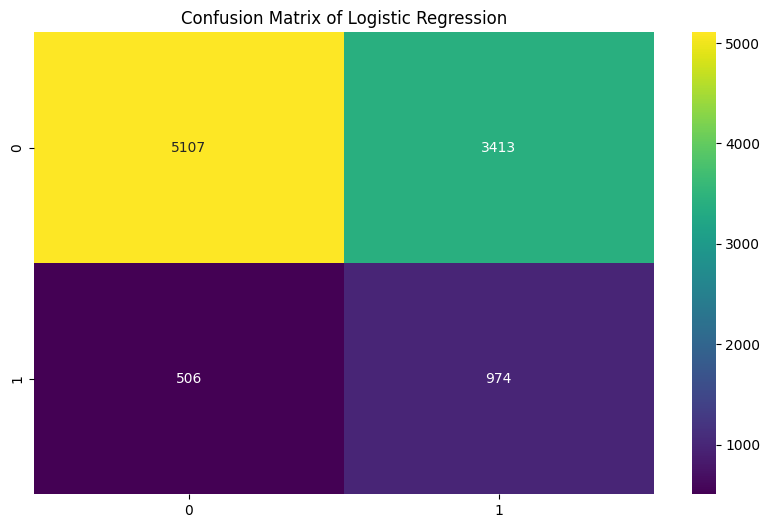

In [112]:
#confusion matrix

lr_cm = confusion_matrix(y_test,lr_pred)

print("Confusion Matrix of Logistic Regression is:",lr_cm)
plt.figure(figsize=(10,6))
sns.heatmap(lr_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [113]:
#now let`s build the model using Random Forest

rf = RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test,rf_pred)

print("Accuracy of Random Forest is:",rf_acc)

Accuracy of Random Forest is: 0.8561


In [114]:
print("Score on training data: ",rf.score(X_train,y_train))

print("Score on testing data: ",rf.score(X_test,y_test))

Score on training data:  0.999875
Score on testing data:  0.8561


Confusion Matrix of Random Forest is: [[8393  127]
 [1312  168]]


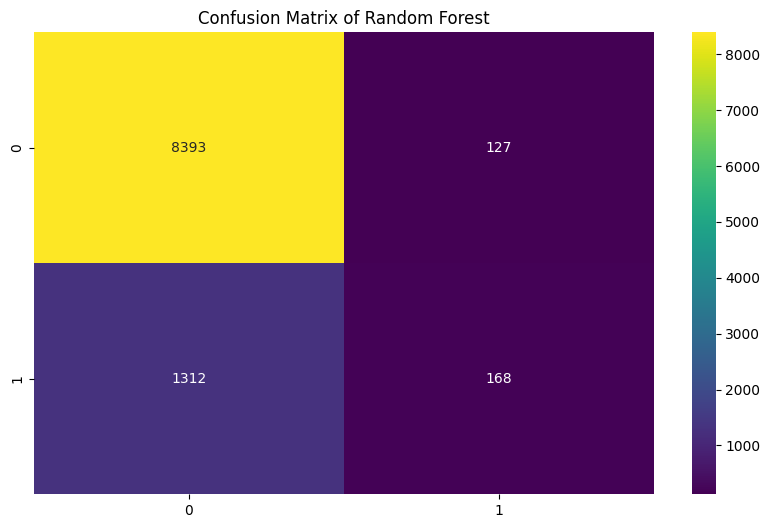

In [115]:
#confusion matrix

rf_cm = confusion_matrix(y_test,rf_pred)

print("Confusion Matrix of Random Forest is:",rf_cm)
plt.figure(figsize=(10,6))
sns.heatmap(rf_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Random Forest")
plt.show()

In [116]:
y_test.value_counts()

0    8520
1    1480
Name: booking_complete, dtype: int64

In [117]:
#let`s` find the percentage of predicting 0s correctly and percentage of predicting 1s correctly

tn, fp, fn, tp = confusion_matrix(y_test,rf_pred).ravel()

print("Percentage of Correctly Predictied 0s are:",(tn)/(tn+fp)*100)
print("Percentage of Correctly Predictied 1s are:",(tp)/(tp+fn)*100)

Percentage of Correctly Predictied 0s are: 98.5093896713615
Percentage of Correctly Predictied 1s are: 11.351351351351353


WE CAN SEE OUR MODEL IS STRUGLING TO CORRECTLY PREDICT 1s BECAUSE IN OUR MAIN DATASET 1 is MINORITY

In [118]:
#let`s try with random forest where class weight is balanced

rf1 = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)

rf1.fit(X_train,y_train)

rf1_pred = rf1.predict(X_test)

rf1_acc = accuracy_score(y_test,rf1_pred)

print("Accuracy of Random Forest with Balanced Class Weight is:",rf1_acc)

Accuracy of Random Forest with Balanced Class Weight is: 0.8559


In [119]:
print("Score on training data: ",rf1.score(X_train,y_train))

print("Score on testing data: ",rf1.score(X_test,y_test))

Score on training data:  0.99985
Score on testing data:  0.8559


Confusion Matrix of Random Forest with Balanced Class Weight is: [[8412  108]
 [1333  147]]


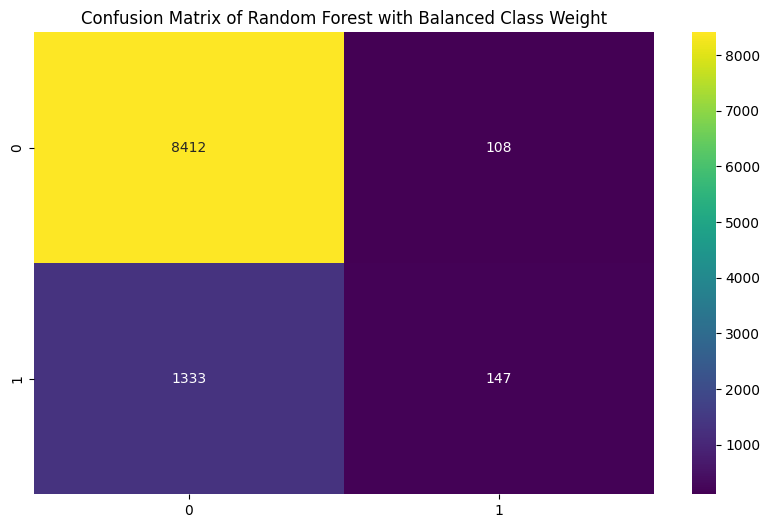

In [120]:
#confusion matrix

rf1_cm = confusion_matrix(y_test,rf1_pred)

print("Confusion Matrix of Random Forest with Balanced Class Weight is:",rf1_cm)

plt.figure(figsize=(10,6))
sns.heatmap(rf1_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Random Forest with Balanced Class Weight")
plt.show()


In [121]:
#percentage of correctly predicted 0s and 1s

tn, fp, fn, tp = confusion_matrix(y_test,rf1_pred).ravel()

print("Percentage of Correctly Predictied 0s are:",(tn)/(tn+fp)*100)
print("Percentage of Correctly Predictied 1s are:",(tp)/(tp+fn)*100)

Percentage of Correctly Predictied 0s are: 98.73239436619718
Percentage of Correctly Predictied 1s are: 9.932432432432432


In [122]:
#manually assigning the class weights

from sklearn.ensemble import RandomForestClassifier

weights = {0: 1, 1: 10}  # Assign 10x more weight to class 1
rf0 = RandomForestClassifier(class_weight=weights, random_state=42)
rf0.fit(X_train, y_train)

rf0_pred = rf0.predict(X_test)

rf0_acc = accuracy_score(y_test,rf0_pred)

print("Accuracy of Random Forest with Manually Assigned Class Weight is:",rf0_acc)

Accuracy of Random Forest with Manually Assigned Class Weight is: 0.8569


In [123]:
#performance on test data and training data

print("Score on training data: ",rf0.score(X_train,y_train))

print("Score on testing data: ",rf0.score(X_test,y_test))

Score on training data:  0.99985
Score on testing data:  0.8569


Confusion Matrix of Random Forest with Manually Assigned Class Weight is: [[8419  101]
 [1330  150]]


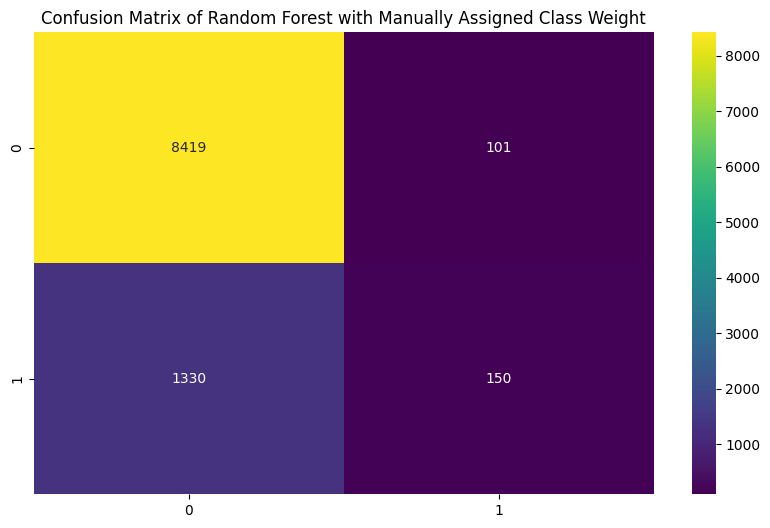

In [124]:
#confusion matrix

rf0_cm = confusion_matrix(y_test,rf0_pred)

print("Confusion Matrix of Random Forest with Manually Assigned Class Weight is:",rf0_cm)

plt.figure(figsize=(10,6))
sns.heatmap(rf0_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Random Forest with Manually Assigned Class Weight")
plt.show()

In [125]:
#classification report

print("Classification Report of Random Forest with Manually Assigned Class Weight is:",classification_report(y_test,rf0_pred))

Classification Report of Random Forest with Manually Assigned Class Weight is:               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.60      0.10      0.17      1480

    accuracy                           0.86     10000
   macro avg       0.73      0.54      0.55     10000
weighted avg       0.82      0.86      0.81     10000



In [126]:
#let`s try with SVM

svm = SVC(kernel='linear',random_state=42)

svm.fit(X_train,y_train)

svm_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_test,svm_pred)

print("Accuracy of SVM is:",svm_acc)

Accuracy of SVM is: 0.852


In [127]:
#performance on test data and training data

print("Score on training data: ",svm.score(X_train,y_train))

print("Score on testing data: ",svm.score(X_test,y_test))

Score on training data:  0.85005
Score on testing data:  0.852


Confusion Matrix of SVM is: [[8520    0]
 [1480    0]]


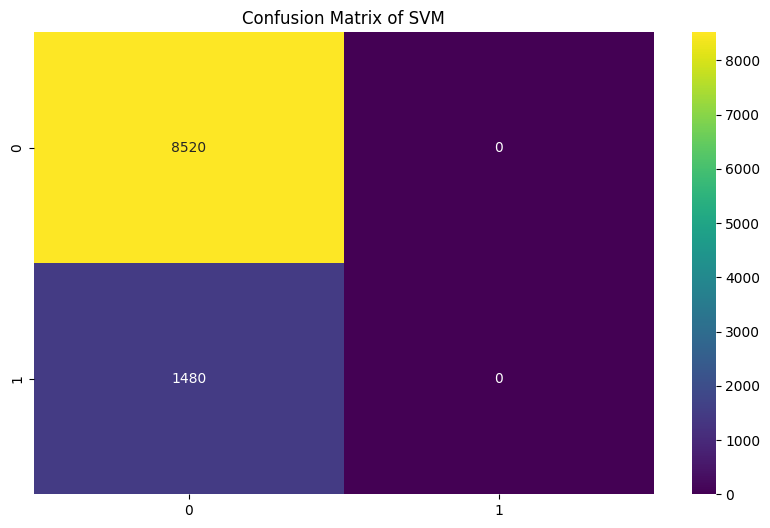

Classification Report of SVM is:               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



C:\Users\mohdt\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohdt\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohdt\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [128]:
#confusion matrix

svm_cm = confusion_matrix(y_test,svm_pred)

print("Confusion Matrix of SVM is:",svm_cm)

plt.figure(figsize=(10,6))
sns.heatmap(svm_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of SVM")
plt.show()

#classification report

print("Classification Report of SVM is:",classification_report(y_test,svm_pred))

So far we have tried three different algorithms and we are still getting the same results so let`s try something with preprocessing of data like SMOTE or Dropping unnecessary columns

In [129]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
#Let`s try SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.4,random_state=42)

X_train_smote,y_train_smote = sm.fit_resample(X_train,y_train)


In [131]:
#now let`s use the Random Forest with SMOTE

rf2 = RandomForestClassifier(n_estimators=100,random_state=42)

rf2.fit(X_train_smote,y_train_smote)

rf2_pred = rf2.predict(X_test)

rf2_acc = accuracy_score(y_test,rf2_pred)

print("Accuracy of Random Forest with SMOTE is:",rf2_acc)

print("Score on training data: ",rf2.score(X_train_smote,y_train_smote))

print("Score on testing data: ",rf2.score(X_test,y_test))

Accuracy of Random Forest with SMOTE is: 0.8512
Score on training data:  0.9998739548758455
Score on testing data:  0.8512


Confusion Matrix of Random Forest with SMOTE is: [[8271  249]
 [1239  241]]


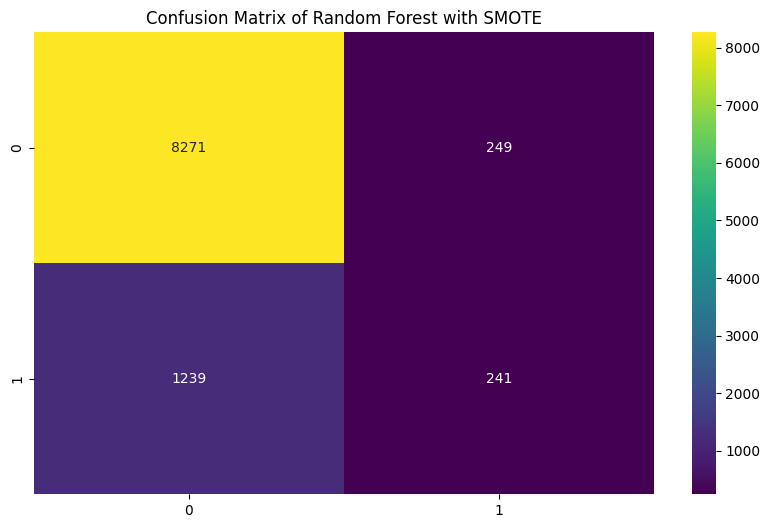

In [132]:
#create confusion matrix

rf2_cm = confusion_matrix(y_test,rf2_pred)

print("Confusion Matrix of Random Forest with SMOTE is:",rf2_cm)

plt.figure(figsize=(10,6))
sns.heatmap(rf2_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Random Forest with SMOTE")
plt.show()

In [133]:
#classification report

print("Classification Report of Random Forest with SMOTE is:",classification_report(y_test,rf2_pred))

Classification Report of Random Forest with SMOTE is:               precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.49      0.16      0.24      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.57      0.58     10000
weighted avg       0.81      0.85      0.82     10000



In [134]:
#with smote things are looking better but not upto the standrads so let`s try and see the weigths of each columns are drop the unnecessary columns

rf2.feature_importances_

array([0.04961113, 0.01199088, 0.00143018, 0.13935031, 0.15155341,
       0.1150295 , 0.08894887, 0.12867561, 0.1645002 , 0.01576062,
       0.01579602, 0.01951324, 0.09784003])

In [135]:
X.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration'],
      dtype='object')

In [136]:
#let`s look at the feature importance of logestic regression

lr.coef_

array([[ 0.03246187, -0.17017402,  0.11144709, -0.0754094 , -0.10820771,
         0.01458511,  0.01846836, -0.08315788,  0.37798431,  0.18759777,
         0.12222645,  0.07345152, -0.25054756]])

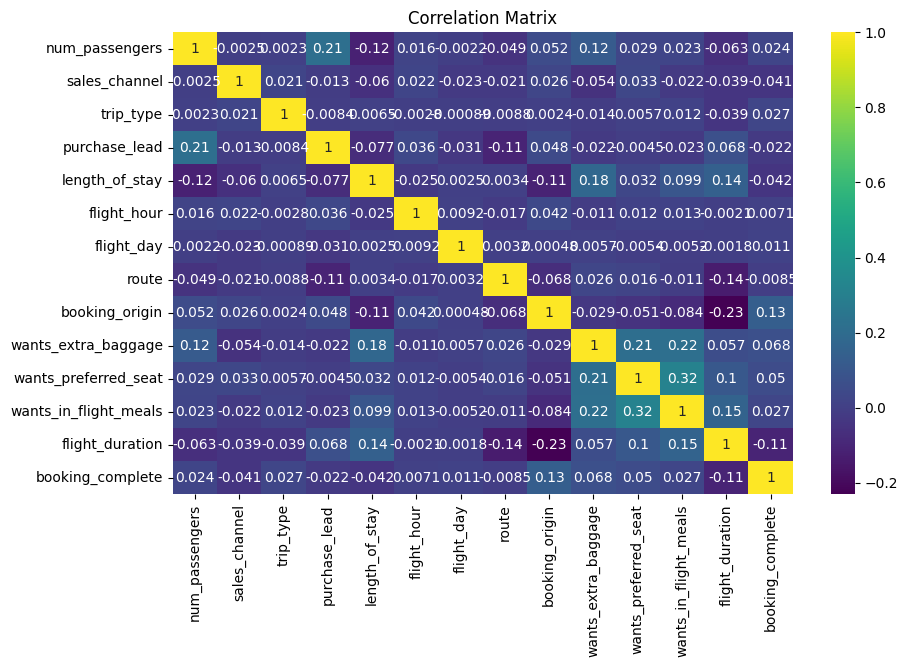

In [137]:
#let`s look at the correlation matrix

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

In [138]:
#let`s drop the unnecessary columns which are not contributing much to the model and not directly correlated with the target variable

#dropping the columns whose absolute correlation is less than 0.05

corr = df.corr()['booking_complete'].abs()

selected_features = corr[corr>0.05].index

selected_features

Index(['booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [139]:
X = df[selected_features]
X = X.drop('booking_complete',axis=1)

In [140]:
X

,booking_origin,wants_extra_baggage,wants_preferred_seat,flight_duration
0,61,1,0,5.52
1,61,0,0,5.52
2,36,1,1,5.52
3,61,0,0,5.52
4,36,1,0,5.52
...,...,...,...,...
49995,4,1,0,5.62
49996,4,0,0,5.62
49997,4,0,0,5.62
49998,4,1,0,5.62


In [141]:
#splitting the dataset into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#scaling the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#building the model

lr = LogisticRegression(class_weight='balanced', random_state=42)

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test,lr_pred)

print("Accuracy of Logistic Regression is:",lr_acc)

print("Score on training data: ",lr.score(X_train,y_train))

print("Score on testing data: ",lr.score(X_test,y_test))

Accuracy of Logistic Regression is: 0.6075
Score on training data:  0.600075
Score on testing data:  0.6075


Confusion Matrix of Logistic Regression is: [[5131 3389]
 [ 536  944]]


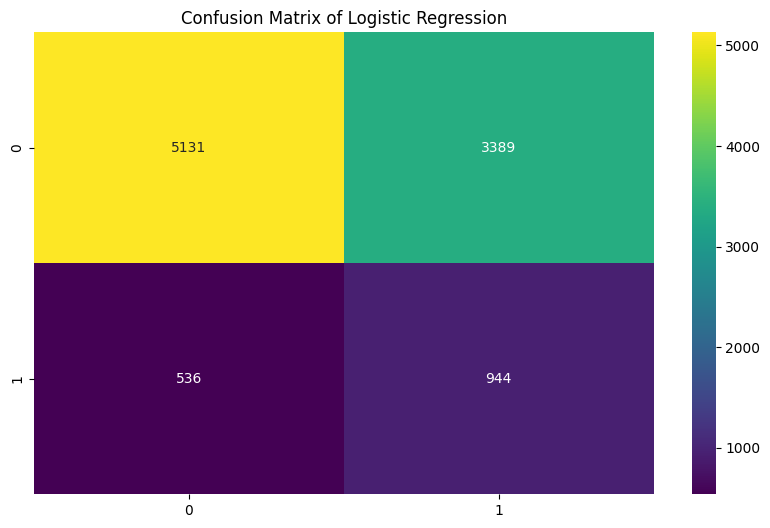

In [142]:
lr_cm = confusion_matrix(y_test,lr_pred)

print("Confusion Matrix of Logistic Regression is:",lr_cm)

plt.figure(figsize=(10,6))
sns.heatmap(lr_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [143]:
#create classification report

print("Classification Report of Logistic Regression is:",classification_report(y_test,lr_pred))

Classification Report of Logistic Regression is:               precision    recall  f1-score   support

           0       0.91      0.60      0.72      8520
           1       0.22      0.64      0.32      1480

    accuracy                           0.61     10000
   macro avg       0.56      0.62      0.52     10000
weighted avg       0.80      0.61      0.66     10000



In [144]:
#now let`s try with Random Forest and see if there is any change or not

rf = RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

print("Accuracy Score of Random Forest after Dropping the unwanted Rows: ", accuracy_score(y_test,rf_pred))

Accuracy Score of Random Forest after Dropping the unwanted Rows:  0.8492


Score on training data:  0.8548
Score on testing data:  0.8492
Confusion Matrix of Random Forest is: [[8430   90]
 [1418   62]]


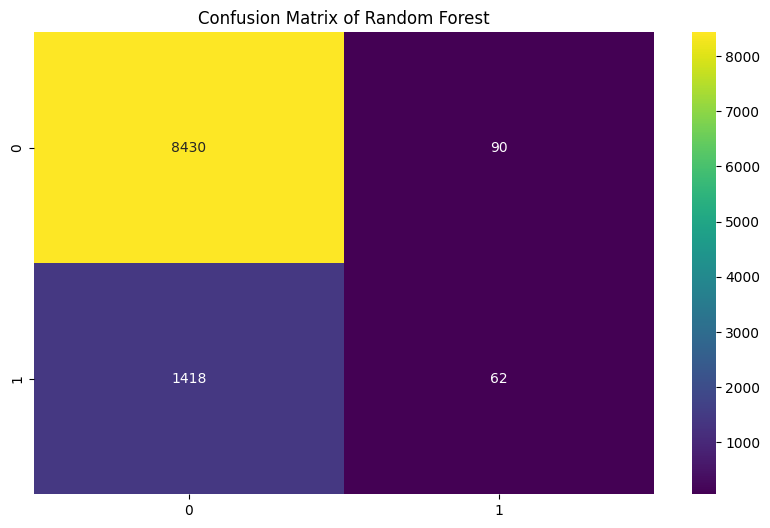

Classification Report of Logistic Regression is:               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.41      0.04      0.08      1480

    accuracy                           0.85     10000
   macro avg       0.63      0.52      0.50     10000
weighted avg       0.79      0.85      0.79     10000



In [145]:
print("Score on training data: ",rf.score(X_train,y_train))

print("Score on testing data: ",rf.score(X_test,y_test))

rf_cm = confusion_matrix(y_test,rf_pred)

print("Confusion Matrix of Random Forest is:",rf_cm)

plt.figure(figsize=(10,6))
sns.heatmap(rf_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Random Forest")
plt.show()

#create classification report

print("Classification Report of Logistic Regression is:",classification_report(y_test,rf_pred))

So basically we can see removing unwated variable is worse in this case we will go back to the basic methods with all the columns

In [146]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [147]:
X = df.drop(['booking_complete'],axis=1)

X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52


In [148]:
#Let`s try undersampleling and smote but before that we need to make sure we do standrd scaling


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [149]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

smote = SMOTE(sampling_strategy=0.4, random_state=42)
undersample = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # Keep 0s at 70% of 1s
pipeline = Pipeline([('smote', smote), ('undersample', undersample)])

X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

In [150]:
sc = StandardScaler()

X_train_resampled = sc.fit_transform(X_train_resampled)
X_test = sc.transform(X_test)

In [151]:
#now let`s try fitting this dataset onto a model

rfc = RandomForestClassifier(n_estimators=100,random_state=42)

rfc.fit(X_train_resampled,y_train_resampled)

rf_pred = rfc.predict(X_test)

print("Accuracy Score of Random Forest after SMOTE and Undersampling: ", accuracy_score(y_test,rf_pred))

Accuracy Score of Random Forest after SMOTE and Undersampling:  0.8026


Score on training data:  0.9998486132978079
Score on testing data:  0.8026
Confusion Matrix of Random Forest is: [[7375 1145]
 [ 829  651]]


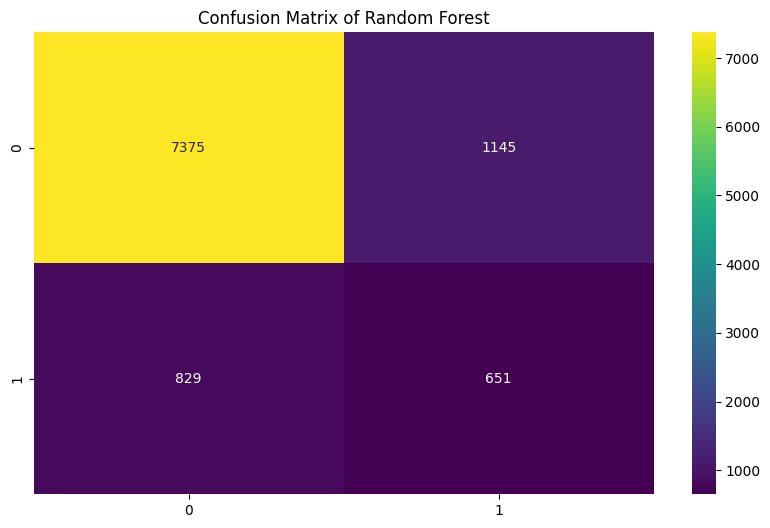

Classification Report of Random Forest after SMOTE and Undersampling is:               precision    recall  f1-score   support

           0       0.90      0.87      0.88      8520
           1       0.36      0.44      0.40      1480

    accuracy                           0.80     10000
   macro avg       0.63      0.65      0.64     10000
weighted avg       0.82      0.80      0.81     10000



In [152]:
print("Score on training data: ",rfc.score(X_train_resampled,y_train_resampled))

print("Score on testing data: ",rfc.score(X_test,y_test))

rf_cm = confusion_matrix(y_test,rf_pred)

print("Confusion Matrix of Random Forest is:",rf_cm)

plt.figure(figsize=(10,6))
sns.heatmap(rf_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Random Forest")
plt.show()

#create classification report

print("Classification Report of Random Forest after SMOTE and Undersampling is:",classification_report(y_test,rf_pred))

In [153]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [154]:
#okay somewhat better 87% for 0s and 44% for 1 let`s try one last thing which is XGBClassifier

from xgboost import XGBClassifier

scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)  # Calculate ratio
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [155]:
xgb_pred = xgb.predict(X_test)

print("Accuracy Score of Random Forest after SMOTE and Undersampling: ", accuracy_score(y_test,xgb_pred))

Accuracy Score of Random Forest after SMOTE and Undersampling:  0.852


Score on training data:  0.7983
Score on testing data:  0.852
Confusion Matrix of Random Forest is: [[7375 1145]
 [ 829  651]]


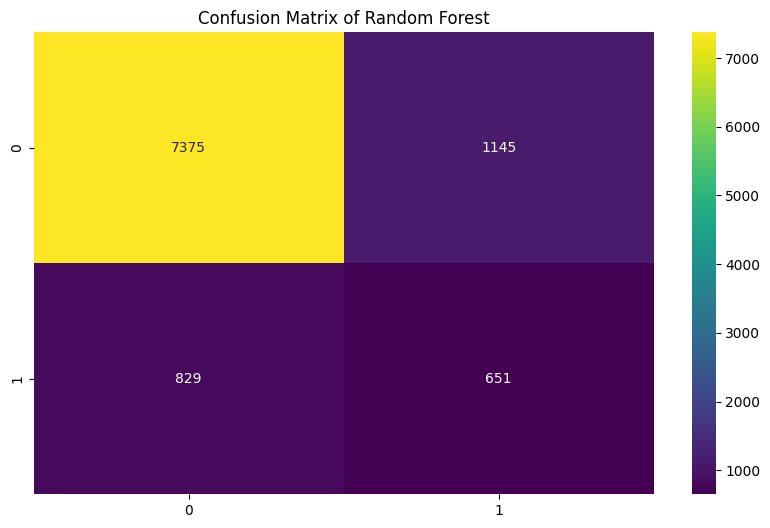

Classification Report of XGB:               precision    recall  f1-score   support

           0       0.90      0.87      0.88      8520
           1       0.36      0.44      0.40      1480

    accuracy                           0.80     10000
   macro avg       0.63      0.65      0.64     10000
weighted avg       0.82      0.80      0.81     10000



In [156]:
print("Score on training data: ",xgb.score(X_train,y_train))

print("Score on testing data: ",xgb.score(X_test,y_test))

xgb_cm = confusion_matrix(y_test,rf_pred)

print("Confusion Matrix of Random Forest is:",xgb_cm)

plt.figure(figsize=(10,6))
sns.heatmap(xgb_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Random Forest")
plt.show()

#create classification report

print("Classification Report of XGB:",classification_report(y_test,rf_pred))

Accuracy Score of Random Forest after SMOTE and Undersampling:  0.7592
Score on training data:  0.8589378708974204
Score on testing data:  0.7592
Confusion Matrix of Random Forest is: [[7375 1145]
 [ 829  651]]


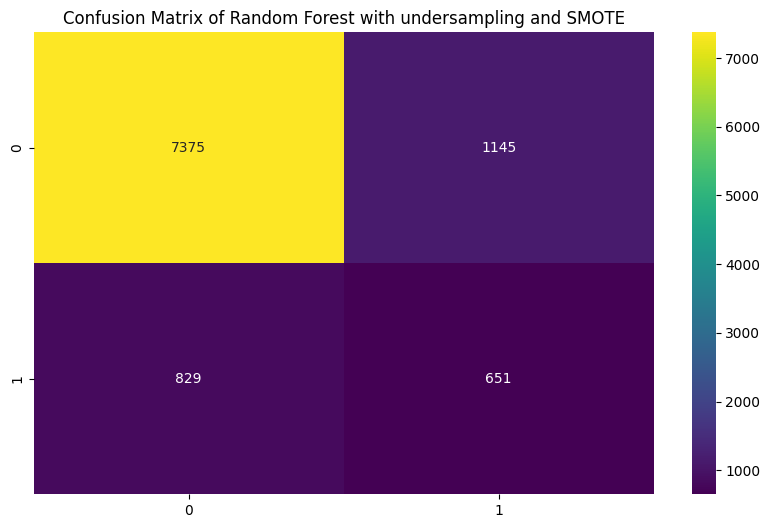

Classification Report of XGB:               precision    recall  f1-score   support

           0       0.90      0.87      0.88      8520
           1       0.36      0.44      0.40      1480

    accuracy                           0.80     10000
   macro avg       0.63      0.65      0.64     10000
weighted avg       0.82      0.80      0.81     10000



In [157]:
#let`s use the resampled dataset on XGB Boost


from xgboost import XGBClassifier

scale_pos_weight = sum(y_train_resampled == 0) / sum(y_train_resampled == 1)  # Calculate ratio
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)


xgb_pred = xgb.predict(X_test)

print("Accuracy Score of Random Forest after SMOTE and Undersampling: ", accuracy_score(y_test,xgb_pred))

print("Score on training data: ",xgb.score(X_train_resampled,y_train_resampled))

print("Score on testing data: ",xgb.score(X_test,y_test))

xgb_cm = confusion_matrix(y_test,rf_pred)

print("Confusion Matrix of Random Forest is:",xgb_cm)

plt.figure(figsize=(10,6))
sns.heatmap(xgb_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Random Forest with undersampling and SMOTE")
plt.show()

#create classification report

print("Classification Report of XGB:",classification_report(y_test,rf_pred))

After all this hassle our final option looks like manually shuffling the dataset having equal number of Target varibale from the dataset so number 0s must be equal to number of 1s in the target dataset

In [158]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


In [159]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [160]:
scaled_df0 = df[df['booking_complete']==0].sample(n=7000)

In [161]:
scaled_df0['booking_complete'].value_counts()

0    7000
Name: booking_complete, dtype: int64

In [162]:
scaled_df1 = df[df['booking_complete']==1].sample(n=7000)

In [163]:
scaled_df1['booking_complete'].value_counts()

1    7000
Name: booking_complete, dtype: int64

In [164]:
#concating the both data frame

scaled_df = pd.concat([scaled_df1,scaled_df0],ignore_index=True)

In [165]:
scaled_df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,2,233,6,7,1,469,51,1,0,1,7.00,1
1,1,0,2,151,6,16,1,515,51,1,0,0,8.83,1
2,2,0,2,401,4,17,3,422,85,1,1,1,6.62,1
3,1,0,2,6,5,10,3,733,4,1,0,0,5.62,1
4,1,0,2,64,3,17,4,113,101,1,0,0,5.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1,0,2,35,5,11,5,160,4,0,1,1,8.83,0
13996,1,0,2,171,90,12,6,519,4,1,0,0,5.62,0
13997,1,0,2,20,84,12,6,175,4,1,1,1,8.83,0
13998,2,0,2,53,277,20,4,626,4,0,0,0,8.83,0


In [166]:
scaled_df['booking_complete'].value_counts()

1    7000
0    7000
Name: booking_complete, dtype: int64

In [167]:
X = scaled_df.drop(['booking_complete'],axis=1)

X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,1,2,233,6,7,1,469,51,1,0,1,7.00
1,1,0,2,151,6,16,1,515,51,1,0,0,8.83
2,2,0,2,401,4,17,3,422,85,1,1,1,6.62
3,1,0,2,6,5,10,3,733,4,1,0,0,5.62
4,1,0,2,64,3,17,4,113,101,1,0,0,5.33


In [168]:
y = scaled_df['booking_complete']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: booking_complete, dtype: int64

In [169]:
y.value_counts()

1    7000
0    7000
Name: booking_complete, dtype: int64

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [171]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [172]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.6253571428571428


Score on training data:  0.6259821428571428
Score on testing data:  0.6253571428571428
Confusion Matrix of Random Forest is: [[857 528]
 [521 894]]


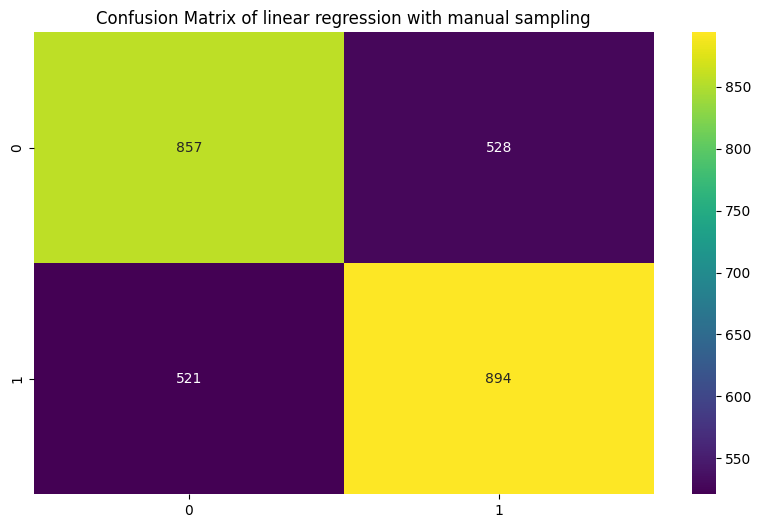

Classification Report of linear regression:               precision    recall  f1-score   support

           0       0.62      0.62      0.62      1385
           1       0.63      0.63      0.63      1415

    accuracy                           0.63      2800
   macro avg       0.63      0.63      0.63      2800
weighted avg       0.63      0.63      0.63      2800



In [173]:
print("Score on training data: ",lr.score(X_train,y_train))

print("Score on testing data: ",lr.score(X_test,y_test))

lr_cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix of Random Forest is:",lr_cm)

plt.figure(figsize=(10,6))
sns.heatmap(lr_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of linear regression with manual sampling")
plt.show()

#create classification report

print("Classification Report of linear regression:",classification_report(y_test,y_pred))

Accuracy:  0.6928571428571428
Score on training data:  0.9999107142857143
Score on testing data:  0.6928571428571428
Confusion Matrix of Random Forest is: [[ 917  468]
 [ 392 1023]]


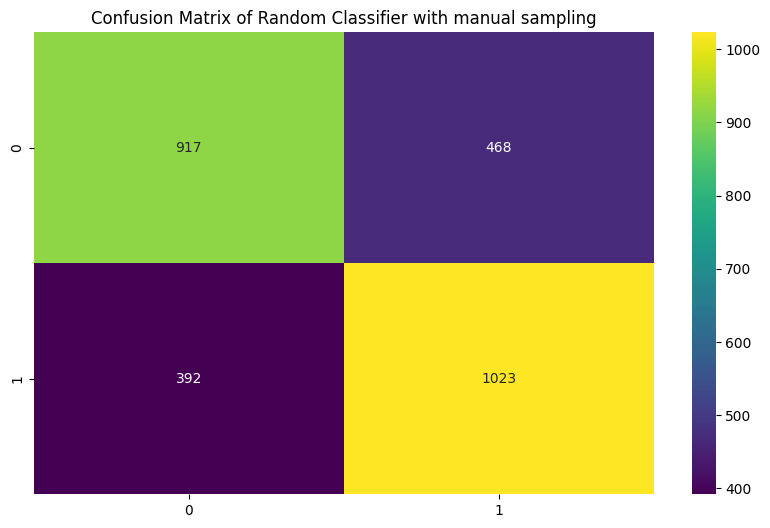

Classification Report of Random Classifier:               precision    recall  f1-score   support

           0       0.70      0.66      0.68      1385
           1       0.69      0.72      0.70      1415

    accuracy                           0.69      2800
   macro avg       0.69      0.69      0.69      2800
weighted avg       0.69      0.69      0.69      2800



In [174]:
#now we will try random forest and other models


rc = RandomForestClassifier()

rc.fit(X_train,y_train)

y_pred = rc.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))

print("Score on training data: ",rc.score(X_train,y_train))

print("Score on testing data: ",rc.score(X_test,y_test))

rc_cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix of Random Forest is:",rc_cm)

plt.figure(figsize=(10,6))
sns.heatmap(rc_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Random Classifier with manual sampling")
plt.show()

#create classification report

print("Classification Report of Random Classifier:",classification_report(y_test,y_pred))

In [175]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


Accuracy:  0.6989285714285715
Score on training data:  0.8809821428571428
Score on testing data:  0.6989285714285715
Confusion Matrix of Random Forest is: [[ 905  480]
 [ 363 1052]]


<Figure size 1000x600 with 0 Axes>

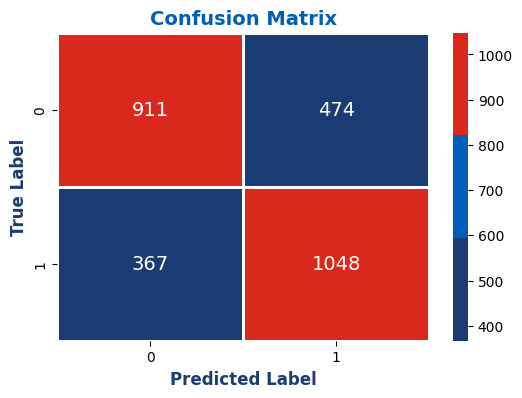

Classification Report of Random Classifier:               precision    recall  f1-score   support

           0       0.71      0.65      0.68      1385
           1       0.69      0.74      0.71      1415

    accuracy                           0.70      2800
   macro avg       0.70      0.70      0.70      2800
weighted avg       0.70      0.70      0.70      2800



In [194]:
#Now trying with the best parametes

rc = RandomForestClassifier(max_depth=15,max_features='sqrt',min_samples_leaf=1,min_samples_split=10,n_estimators=300)

rc.fit(X_train,y_train)

y_pred = rc.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))

print("Score on training data: ",rc.score(X_train,y_train))

print("Score on testing data: ",rc.score(X_test,y_test))

rc_cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix of Random Forest is:",rc_cm)

plt.figure(figsize=(10,6))
# Define British Airways colors
colors = ["#1A3C73", "#005EB8", "#DA291C"]  # Dark Blue, Light Blue, Red
cmap = sns.color_palette(colors, as_cmap=True)  # Create a custom colormap

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, linewidths=1, linecolor='white', annot_kws={"size": 14})

# Customize labels and title
plt.xlabel("Predicted Label", fontsize=12, fontweight="bold", color="#1A3C73")
plt.ylabel("True Label", fontsize=12, fontweight="bold", color="#1A3C73")
plt.title("Confusion Matrix", fontsize=14, fontweight="bold", color="#005EB8")

# Show plot
plt.show()

#create classification report

print("Classification Report of Random Classifier:",classification_report(y_test,y_pred))

In [177]:
rc.feature_importances_

array([0.03469003, 0.01842637, 0.00367034, 0.12856499, 0.11588148,
       0.09071708, 0.05548189, 0.1570568 , 0.24675304, 0.02695764,
       0.01826117, 0.0172663 , 0.08627289])

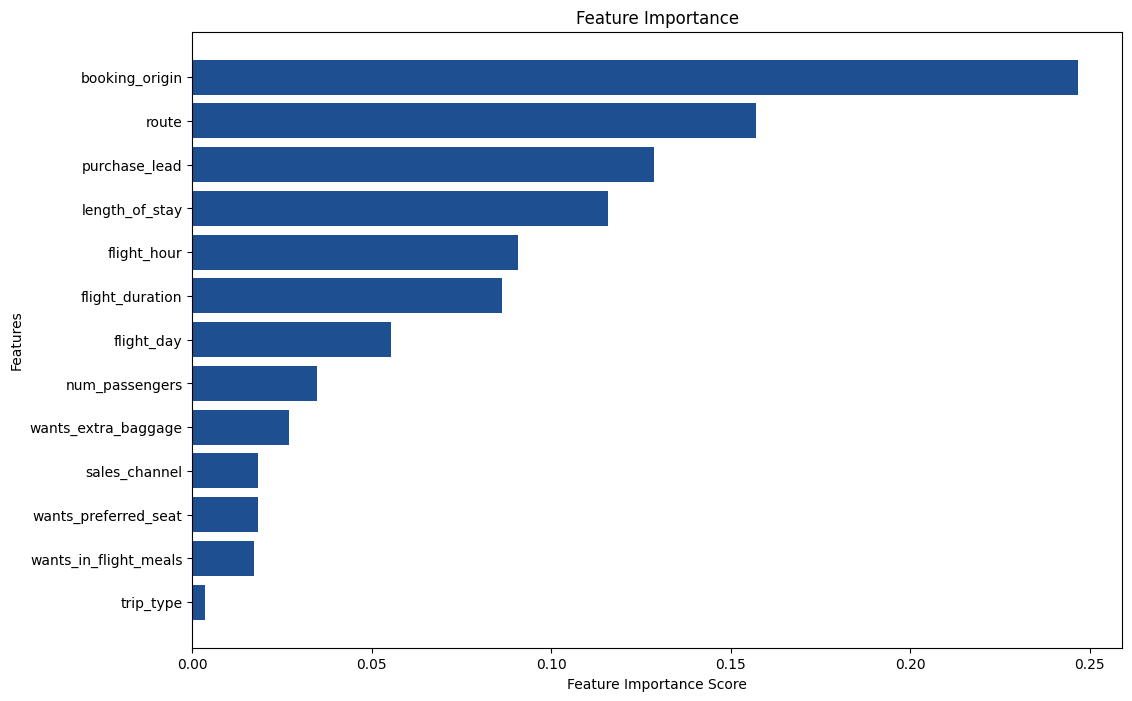

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the trained Random Forest model
feature_importance =  rc.feature_importances_ # Assuming you used GridSearchCV
feature_names = df.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Define British Airways' blue color
ba_blue = "#1D4F91"

# Plot feature importance for all features
plt.figure(figsize=(12, 8))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color=ba_blue)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

log_reg = LogisticRegression(class_weight='balanced', max_iter=500)
grid_log = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_log.fit(X_train, y_train)

print("Best Parameters:", grid_log.best_params_)
print("Best Score:", grid_log.best_score_)

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Score: 0.6313917454196916


Accuracy:  0.6253571428571428
Score on training data:  0.6258928571428571
Score on testing data:  0.6253571428571428
Confusion Matrix of Random Forest is: [[857 528]
 [521 894]]


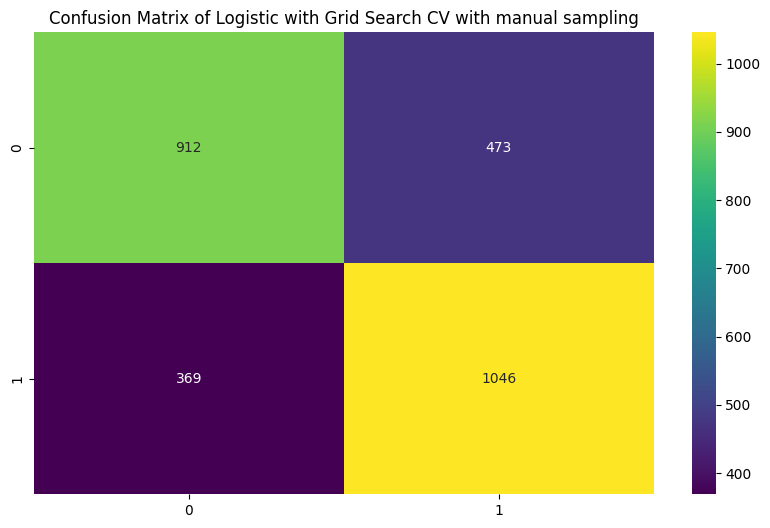

Classification Report of Logistic with Grid Search CV:               precision    recall  f1-score   support

           0       0.62      0.62      0.62      1385
           1       0.63      0.63      0.63      1415

    accuracy                           0.63      2800
   macro avg       0.63      0.63      0.63      2800
weighted avg       0.63      0.63      0.63      2800



In [180]:
#Now trying with the best parametes

lr = LogisticRegression(C=0.1,solver='liblinear')

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))

print("Score on training data: ",lr.score(X_train,y_train))

print("Score on testing data: ",lr.score(X_test,y_test))

lr_cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix of Random Forest is:",lr_cm)

plt.figure(figsize=(10,6))
sns.heatmap(rc_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of Logistic with Grid Search CV with manual sampling")
plt.show()

#create classification report

print("Classification Report of Logistic with Grid Search CV:",classification_report(y_test,y_pred))

Now that we know Random Classifier is better with 70% accuracy but let`s try XGBBost

Accuracy:  0.6978571428571428
Score on training data:  0.871875
Score on testing data:  0.6978571428571428
Confusion Matrix of Random Forest is: [[ 933  452]
 [ 394 1021]]


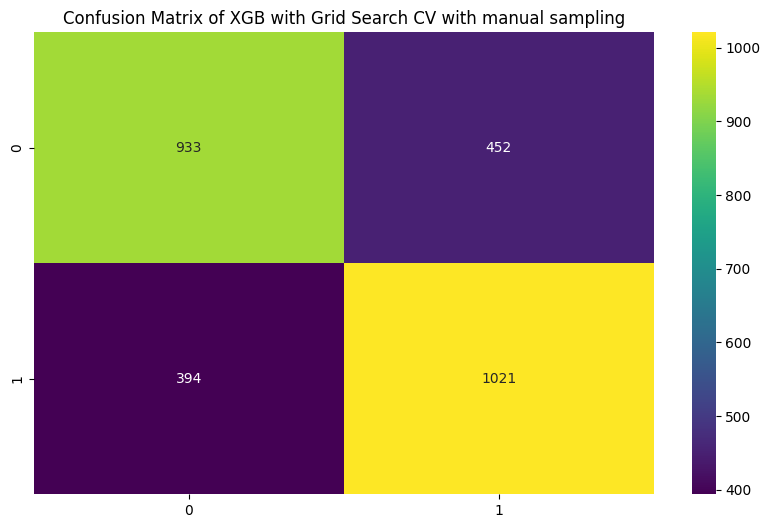

Classification Report of XGB with Grid Search CV:               precision    recall  f1-score   support

           0       0.70      0.67      0.69      1385
           1       0.69      0.72      0.71      1415

    accuracy                           0.70      2800
   macro avg       0.70      0.70      0.70      2800
weighted avg       0.70      0.70      0.70      2800



In [181]:
from xgboost import XGBClassifier

scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)  # Calculate ratio
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))

print("Score on training data: ",xgb.score(X_train,y_train))

print("Score on testing data: ",xgb.score(X_test,y_test))

xgb_cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix of Random Forest is:",xgb_cm)

plt.figure(figsize=(10,6))
sns.heatmap(xgb_cm,annot=True,fmt="d",cmap='viridis')
plt.title("Confusion Matrix of XGB with Grid Search CV with manual sampling")
plt.show()

#create classification report

print("Classification Report of XGB with Grid Search CV:",classification_report(y_test,y_pred))

In [182]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

Out of all of them only Random Classifer is working well so we will go with that.

In [196]:
from sklearn.utils import shuffle

def get_next_batch():
    
    minority_class = df[df['booking_complete'] == 1]

    # Randomly sample majority class (0s) to match minority class count
    majority_class_sample = df[df['booking_complete'] == 0].sample(len(minority_class), random_state=i)

    # Create a balanced subset
    subset = shuffle(pd.concat([minority_class, majority_class_sample]))

    # Split into features and labels
    X_subset = subset.drop(columns=['booking_complete'])
    y_subset = subset['booking_complete']

    return X_subset,y_subset
